In [1]:
# silencing warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(palette="Set2")

# CO2 concentration data

In [2]:
url = "https://github.com/PacktPublishing/Practical-Time-Series-Analysis/raw/master/Data%20Files/Monthly_CO2_Concentrations.xlsx"
df_co2 = pd.read_excel(url, converters={'Year': np.int32, 'Month': np.int32})
df_co2.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [3]:
df_co2.shape

(174, 3)

In [4]:
df_co2.isnull().sum()

CO2      13
Year     13
Month    13
dtype: int64

In [5]:
df_co2.dropna(inplace=True)

<AxesSubplot:title={'center':'Monthly CO2 concentrations'}, xlabel='Time', ylabel='CO2 concentratition'>

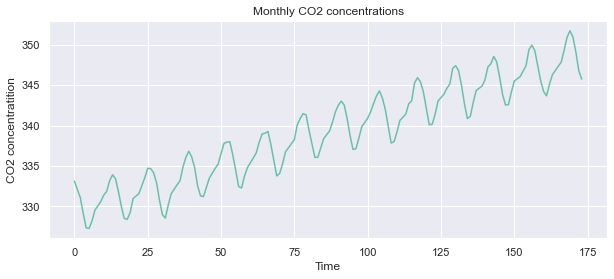

In [6]:
df_co2['CO2'].plot(xlabel="Time", ylabel="CO2 concentratition",
                   title="Monthly CO2 concentrations", figsize=(10, 4))

# Trend via Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

trend_model = LinearRegression(normalize=True, fit_intercept=True)
X = np.array(df_co2.index).reshape((-1,1))
y = df_co2['CO2']
trend_model.fit(X, y)
intercept = trend_model.intercept_
coef = trend_model.coef_[0]
print(f'Trend model intercept={intercept} coefficient={coef}')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


SKLEARNEX INFO: sklearn.linar_model.LinearRegression.fit: running accelerated version on CPU
Trend model intercept=329.4554222337018 coefficient=0.11182207854546689


In [8]:
df_co2['trendline'] = trend_model.predict(X)

SKLEARNEX INFO: sklearn.linar_model.LinearRegression.predict: running accelerated version on CPU


<AxesSubplot:title={'center':'Monthly CO2 concentrations'}, xlabel='Time', ylabel='CO2 concentratition'>

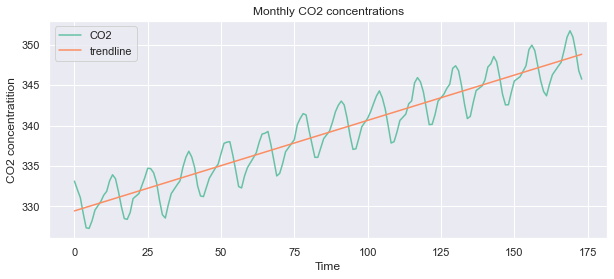

In [9]:
df_co2[['CO2', 'trendline']].plot(xlabel="Time", ylabel="CO2 concentratition",
                   title="Monthly CO2 concentrations", figsize=(10, 4))

In [10]:
df_co2['detrended'] = df_co2['CO2'] - df_co2['trendline']

<AxesSubplot:title={'center':'Detrended Monthly CO2 concentrations'}, xlabel='Time', ylabel='CO2 concentratition'>

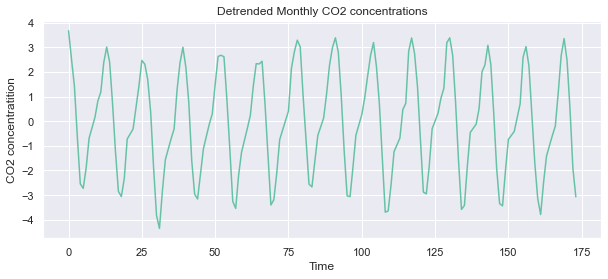

In [11]:
df_co2['detrended'].plot(xlabel="Time", ylabel="CO2 concentratition",
                   title="Detrended Monthly CO2 concentrations", figsize=(10, 4))

# Trend via moving average

<AxesSubplot:>

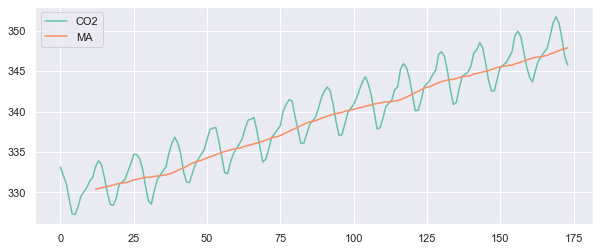

In [12]:
df_co2['MA'] = df_co2['CO2'].rolling(window=12).mean()
df_co2[['CO2', 'MA']].plot(figsize=(10, 4))

# Time series decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# specify the number of observations in a cycle
decomposition = seasonal_decompose(df_co2['CO2'], period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

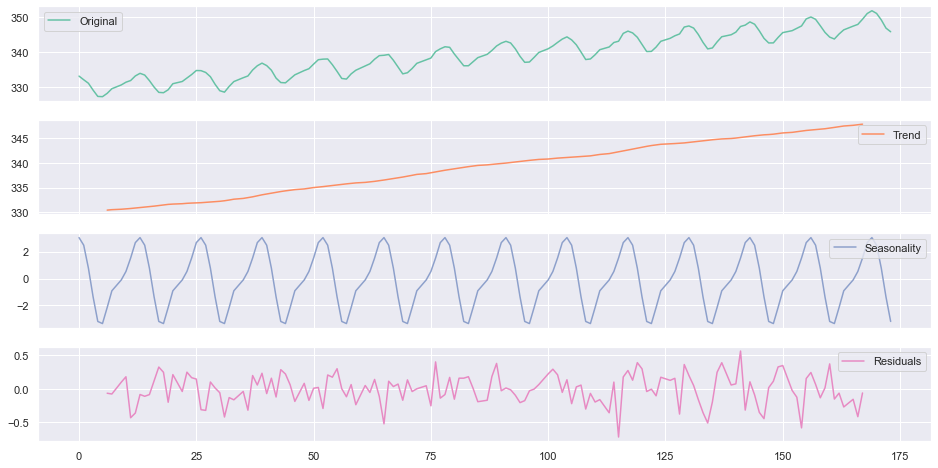

In [14]:
df = pd.DataFrame(index=df_co2.index)
df["Original"] = df_co2['CO2']
df["Trend"] = trend
df['Seasonality'] = seasonal
df['Residuals'] = residual
df.plot(subplots=True, figsize=(16, 8))

# Citing this notebook

If you use this notebook in your work, please cite it as follows:
    
Pekar, V. (2023). Big Data for Decision Making. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm
